# Introduction to neural network classification with TensorFlow

Types of classification
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view it

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 10**3

# Create circles
X, y = make_circles(
    n_samples,
    noise=0.03,
    random_state=42
)

In [2]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Change the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [4]:
# Let's visualize the data
import pandas as pd
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label": y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


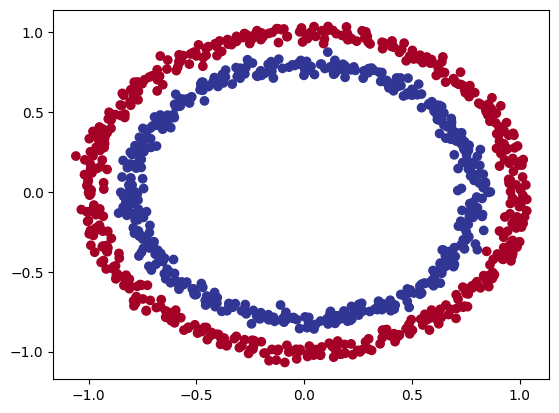

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu) 

## Input and output shapes

In [6]:
# Check the shapes pf our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
#How many sample we're workig with
len(X), len(y)

(1000, 1000)

In [8]:
# View the firsst example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modeling

The steps in modelling with TF are typiaclly:
1. Create or import model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate
7. ...

In [9]:
import tensorflow as tf
tf.__version__

'2.14.1'

In [10]:
# Set seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1_history = model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 5.5565 - accuracy: 0.4730
Epoch 2/5
32/32 [==============================] - 0s 943us/step - loss: 4.5733 - accuracy: 0.4640
Epoch 3/5
32/32 [==============================] - 0s 967us/step - loss: 4.5499 - accuracy: 0.5070
Epoch 4/5
32/32 [==============================] - 0s 910us/step - loss: 6.1232 - accuracy: 0.4790
Epoch 5/5
32/32 [==============================] - 0s 932us/step - loss: 5.9799 - accuracy: 0.4770


In [11]:
# Let's try to improve our model by training longer
model_1_history = model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 714us/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Since we are working with binary classification and our model is getting around 50% accuracy... it's performing as if it's guessing

So let's step things up a notch and add an extra layer.

In [12]:
# Set seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2_history = model_2.fit(X, y, epochs=100, verbose=0)

# 4. evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 745us/step - loss: 0.6932 - accuracy: 0.5000


[0.693234384059906, 0.5]

## Improving our model

Let's look into our bag of tricks to see how we can improve our model

1. Create a model - we might to add more layers or increase the number of units within layer
2. Compiling a model - here we might choose different a different optimization function such as Adam instead of sGD.
3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer).

In [13]:
# Set seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3_history = model_3.fit(X, y, epochs=100, verbose=0)

# 4. evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 739us/step - loss: 0.6940 - accuracy: 0.5010


[0.6939665079116821, 0.5009999871253967]

In [14]:
# To visualize our models predictions
import numpy as np

In [15]:
def plot_decision_boundaries(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Create X value (We're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

    # Make predictions
    y_pred = model.predict(x_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("Doing multiclass classification")
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("Doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    

313/313 [==============================] - 0s 496us/step
Doing binary classification


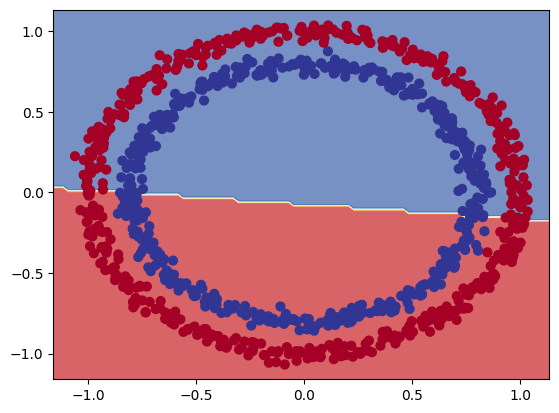

In [16]:
# Check out the predictions our model is making
plot_decision_boundaries(model_3, X, y)

In [17]:
# Let's see if our model can be used for a regression problem...

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit the model - this will break
#model_3_history = model_3.fit(X_reg_train, y_reg_train, epochs=100, verbose=0)

#model_3.evaluate(X_reg_test, y_reg_test)

In [18]:
# Let's change the loss function for regression problem
# Set seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Fit the model
model_3_history = model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100, verbose=0)

model_3.evaluate(tf.expand_dims(X_reg_test, axis=-1), y_reg_test)

2/2 [==============================] - 0s 2ms/step - loss: 62.9181 - mae: 62.9181


[62.91813659667969, 62.91813659667969]

2/2 [==============================] - 0s 1ms/step


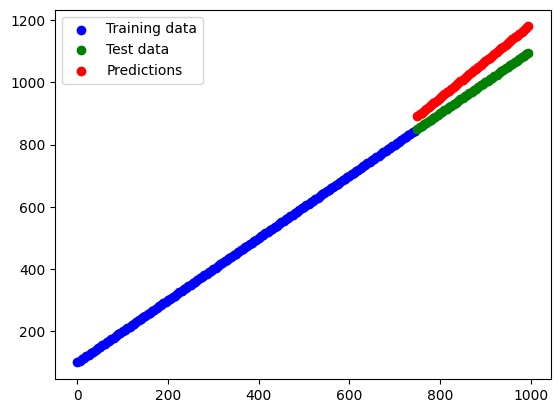

In [19]:
# Make preds with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figure=(10,7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend()

## The missing piece - non-linearity

In [20]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Cmpile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
model_4.fit(X, y, epochs=100, verbose=0)
model_4.evaluate(X, y)

32/32 [==============================] - 0s 714us/step - loss: 4.2532 - accuracy: 0.4730


[4.253194332122803, 0.4729999899864197]

313/313 [==============================] - 0s 460us/step
Doing binary classification


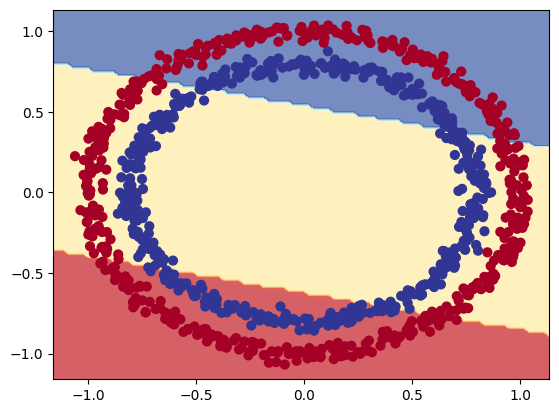

In [21]:
# Check the decision boundary for our model
plot_decision_boundaries(model_4, X, y)

Let's try to build our first nn with non-linear activation function.

In [22]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Cmpile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
model_5.fit(X, y, epochs=100, verbose=0)
model_5.evaluate(X, y)

32/32 [==============================] - 0s 723us/step - loss: 0.7575 - accuracy: 0.4920


[0.7575473785400391, 0.492000013589859]

313/313 [==============================] - 0s 456us/step
Doing binary classification


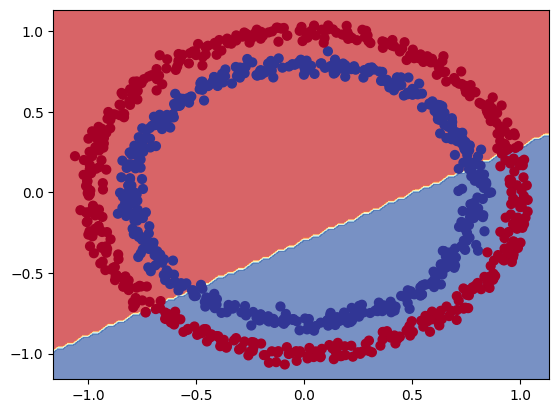

In [23]:
# Check the decision boundary for our model
plot_decision_boundaries(model_5, X, y)

In [24]:
# Multi layer nn with relu

# random seed
tf.random.set_seed(42)

# 1. Create model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Cmpile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
model_6_his = model_6.fit(X, y, epochs=200, verbose=0)
model_6.evaluate(X, y)


32/32 [==============================] - 0s 738us/step - loss: 0.3839 - accuracy: 0.7780


[0.38390353322029114, 0.777999997138977]

313/313 [==============================] - 0s 504us/step
Doing binary classification


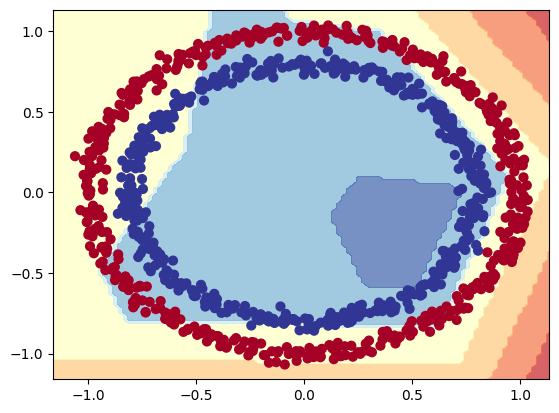

In [25]:
# Check the decision boundary for our model
plot_decision_boundaries(model_6, X, y)

In [26]:
# Multi layer nn with relu, with softmax output activation

# random seed
tf.random.set_seed(42)

# 1. Create model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Cmpile the model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
model_7_his = model_7.fit(X, y, epochs=200, verbose=0)
model_7.evaluate(X, y)

32/32 [==============================] - 0s 716us/step - loss: 0.0299 - accuracy: 0.9990


[0.02993924356997013, 0.9990000128746033]

313/313 [==============================] - 0s 508us/step
Doing binary classification


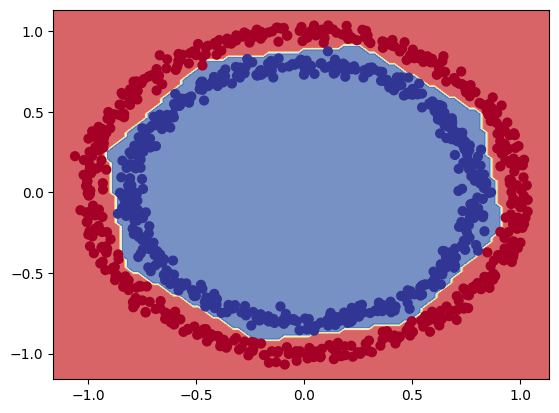

In [27]:
# Check the decision boundary for our model
plot_decision_boundaries(model_7, X, y)

In [28]:
# Create a toy atensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

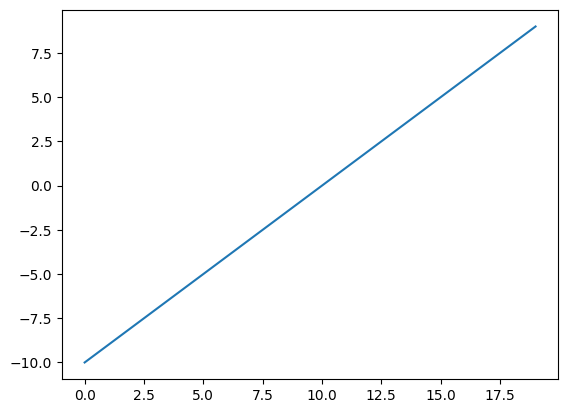

In [29]:
# Visualize our toy data
plt.plot(A)

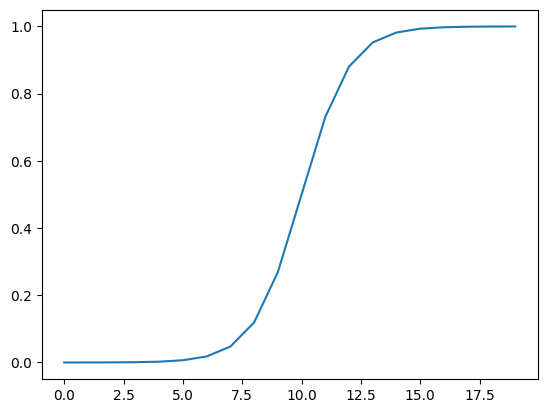

In [30]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

# Use sigmoid on our toy tensor
plt.plot(sigmoid(A))

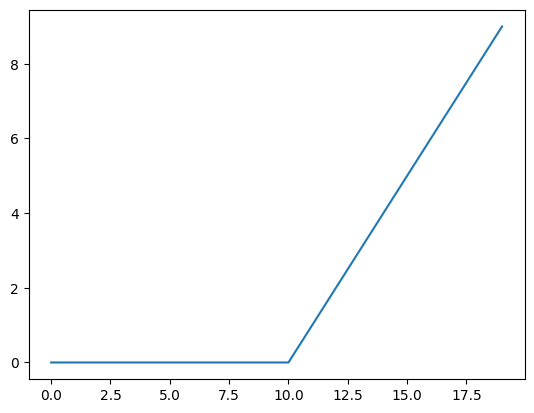

In [31]:
# Let's replicate ReLu - ReLu = Max(0, x)
def relu(x):
    return tf.maximum(0, x)

# Use relu
plt.plot(relu(A))

## Evaluating and improving our classification

In [32]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [33]:
# Let's recreate a model to fit on the training data and evaluate on the test data

# Set random seed
tf.random.set_seed(42)

# 1. Create model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# 2. Compile model
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 3. fit the model
model_8_his = model_8.fit(X_train, y_train, epochs=25, verbose=0)

# 4. Evaluate
model_8.evaluate(X, y)

32/32 [==============================] - 0s 768us/step - loss: 0.1160 - accuracy: 0.9820


[0.11598267406225204, 0.9819999933242798]

313/313 [==============================] - 0s 503us/step
Doing binary classification
313/313 [==============================] - 0s 511us/step
Doing binary classification


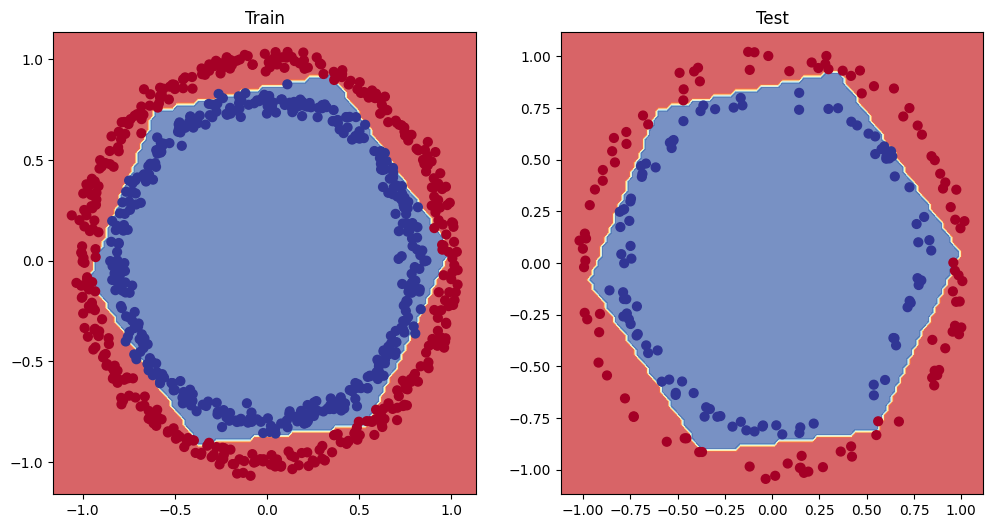

In [34]:
# Plot the decision boundaries for the trainig and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundaries(model_8, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundaries(model_8, X_test, y_test)

## Plot the loss (or training) curves

In [35]:
import pandas as pd

Text(0.5, 1.0, 'Model 8 loss curves')

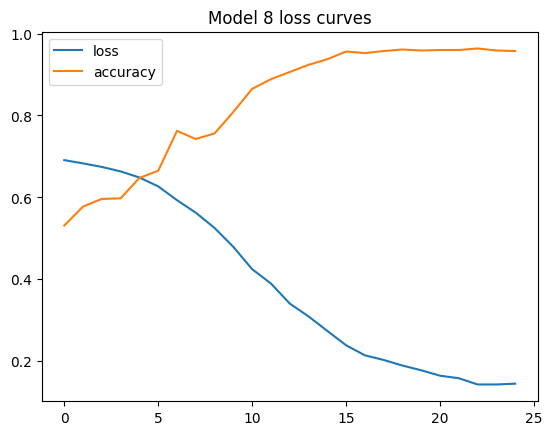

In [36]:
pd.DataFrame(model_8_his.history).plot()
plt.title("Model 8 loss curves")

## Finding the best learning rate

To find the ideal learning rate (the leraning rate where the loss decreases the most during training) we're going to use the following steps.
* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your *while* its training.
* Another model (we could use the same one as abovve, but we're practicing building models here).
* A modified loss curves plot.

In [37]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model 8)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# Compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch/20))

# Fit the model
model_9_his = model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 1ms/step - loss: 0.6928 - accuracy: 0.4963 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 985us/step - loss: 0.6917 - accuracy: 0.4988 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 952us/step - loss: 0.6911 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 961us/step - loss: 0.6905 - accuracy: 0.5000 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 990us/step - loss: 0.6898 - accuracy: 0.5000 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6892 - accuracy: 0.4975 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6885 - accuracy: 0.5025 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 1ms/step

<Axes: >

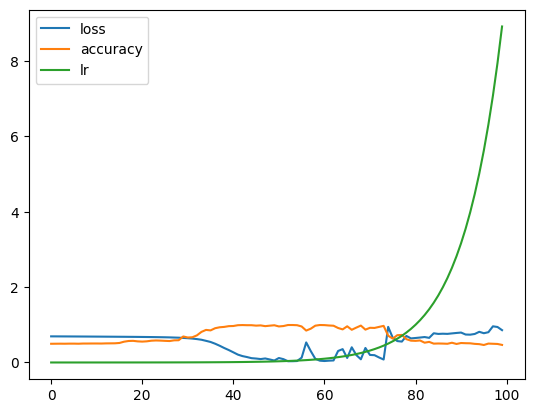

In [38]:
# Checkout the history
pd.DataFrame(model_9_his.history).plot()

Text(0.5, 1.0, 'Learning rate vs loss')

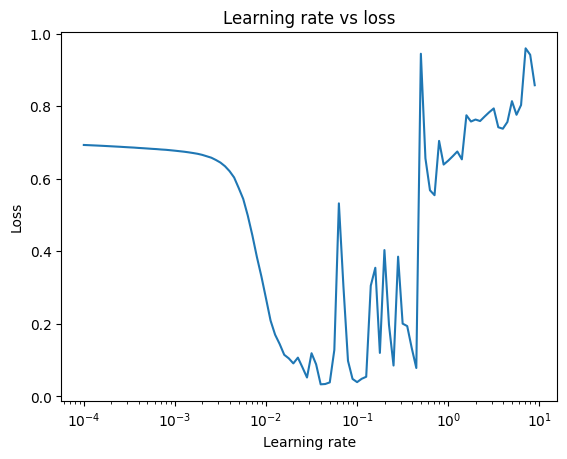

In [39]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figure=(10,7))
plt.semilogx(lrs, model_9_his.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs loss")

In [40]:
# Lets build same model with lr 0.02
tf.random.set_seed(42)

# Create a model (same as model 8)
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# Compile the model
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=["accuracy"])

# Fit the model
model_10_his = model_10.fit(X_train, y_train, epochs=20, verbose=0)
model_10.evaluate(X_test, y_test), model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.1149 - accuracy: 0.9900


([0.04114307090640068, 0.9900000095367432],
 [0.11489129066467285, 0.9900000095367432])

313/313 [==============================] - 0s 493us/step
Doing binary classification
313/313 [==============================] - 0s 495us/step
Doing binary classification


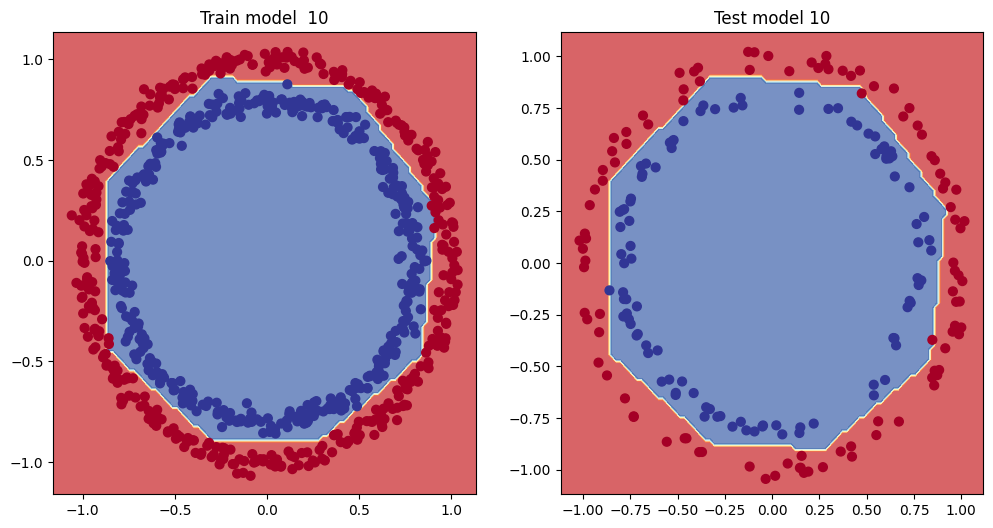

In [41]:
# Plot the decision boundaries for the trainig and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train model  10")
plot_decision_boundaries(model_10, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test model 10")
plot_decision_boundaries(model_10, X_test, y_test)
plt.show()

## More classification evaluation methods

Alongside visualizing our models results as much as possible, there are handfule of other classification evaluation methods & metrics you should be familiar with:
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report

In [42]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 1ms/step - loss: 0.0411 - accuracy: 0.9900
Model loss on the test set: 0.04114307090640068
Model accuracy on the test set: 99.00%


## How about the confusion matrix

In [43]:
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
#confusion_matrix(y_test, y_preds)
# Makes an error

7/7 [==============================] - 0s 620us/step


In [44]:
# Check values
y_test[:10], y_preds[:10]

(array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0]),
 array([[0.9910144 ],
        [0.99851185],
        [0.997584  ],
        [0.9992124 ],
        [0.67577535],
        [0.01463351],
        [0.975316  ],
        [0.01609481],
        [0.99594706],
        [0.01219101]], dtype=float32))

In [45]:
y_preds_bin = tf.round(y_preds)
y_preds_bin[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [46]:
confusion_matrix(y_test, y_preds_bin)

array([[99,  2],
       [ 0, 99]])

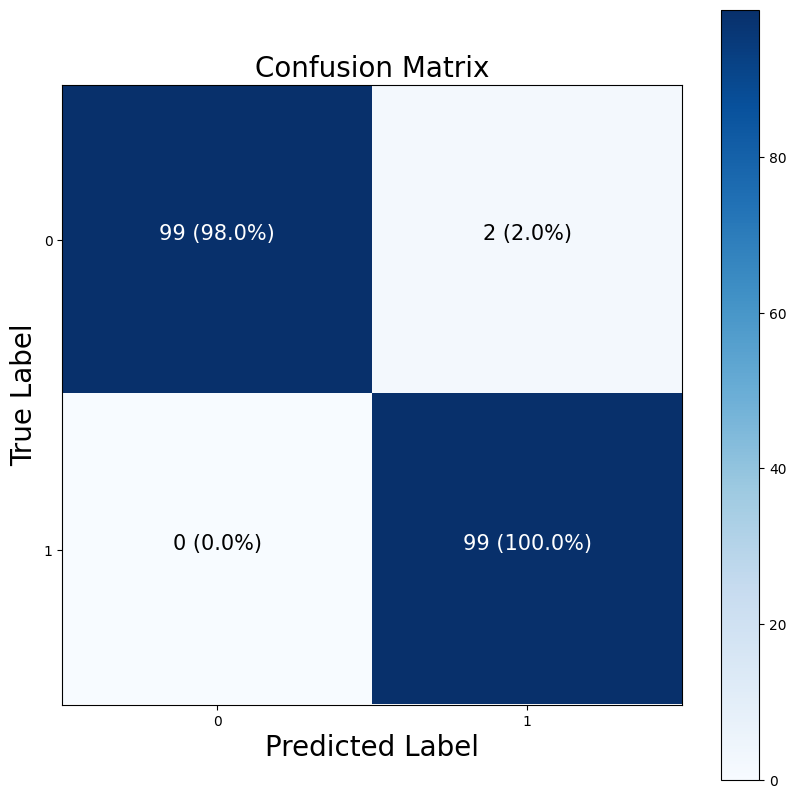

In [47]:
import itertools

figsize = (10,10)

# Crate the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
    labels =classes
else:
    labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set treshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=15)

## Working with a larger example (multiclass classification)

When you have more than two classes as an option, it's known as **multi-class classification**.

* This means if you have 3 different classes, it's multi-class classification.
* It also means if you have 100 different classes, it's multi-class classification.

To practise multi-class classification we're going to build a neural network to classify images of different items of clothing.

In [48]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [49]:
print(f"Trainig sample:\{train_data[0]}")
print(f"Trainig sample:\{train_labels[0]}")

Trainig sample:\[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   

In [50]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

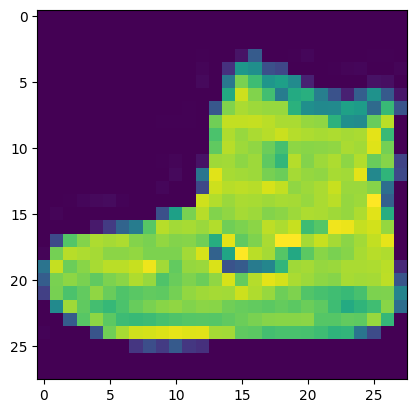

In [51]:
# plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [52]:
# Create a small list so we can index onto our trainig labels so human read able
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

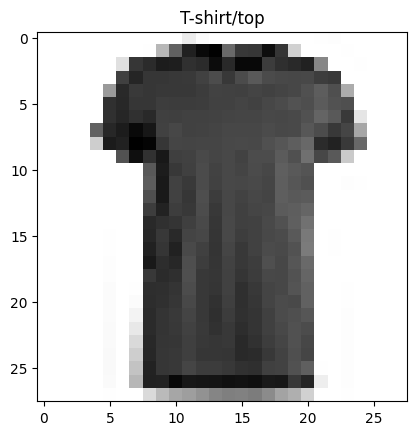

In [53]:
# Plot an example image and its label
idx=17
plt.imshow(train_data[idx], cmap=plt.cm.binary)
plt.title(class_names[train_labels[idx]])

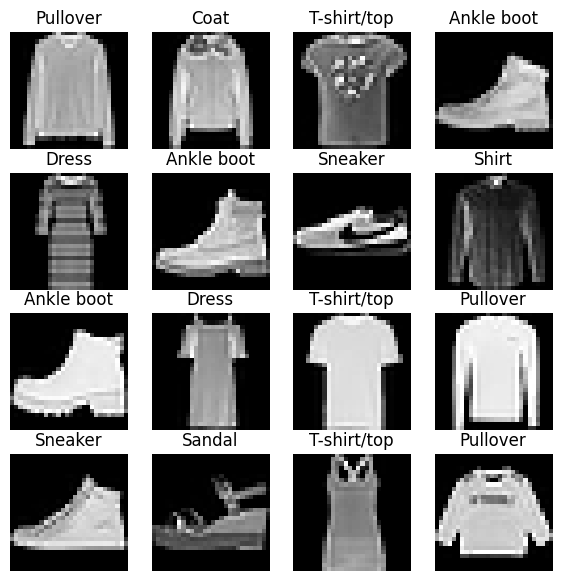

In [54]:
# Plot multiple random images
import random
plt.figure(figsize=(7, 7))
for i in range(16):
    ax = plt.subplot(4,4,i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary_r),
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

## Building a multi-class model

For our multi-class classification model, we can use a similar architecture to our binary classifiers, however, we're going to have to tweak a few things:

* Input shape = 28x28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function
  - If you are using one_hot encoded labels use **tf.keras.losses.CategoricalCrossentropy()**
  - If you are using integer form use **tf.keras.losses.SparseCategoricalCrossentropy()**
* Output activaion = Softmax (not sigmoid)

In [55]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
model_11_his = model_11.fit(
    train_data, 
    tf.one_hot(train_labels, depth=10), 
    epochs=10, 
    validation_data=(test_data, tf.one_hot(test_labels, depth=10))
)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.2728 - accuracy: 0.1278 - val_loss: 2.2937 - val_accuracy: 0.1588
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.1300 - accuracy: 0.1822 - val_loss: 2.0175 - val_accuracy: 0.2189
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.0249 - accuracy: 0.2192 - val_loss: 1.9782 - val_accuracy: 0.2275
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.8511 - accuracy: 0.2679 - val_loss: 1.6888 - val_accuracy: 0.2997
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6429 - accuracy: 0.3236 - val_loss: 1.6413 - val_accuracy: 0.3379
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6045 - accuracy: 0.3345 - val_loss: 1.6409 - val_accuracy: 0.3389
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5630 - accuracy: 0.3460 - val_loss: 1.5249 - val_accuracy:

Check the difference between SparseCategoricalCrossentropy and CategoricalCrossentropy

In [56]:
model_11.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_26 (Dense)            (None, 4)                 3140      
                                                                 
 dense_27 (Dense)            (None, 4)                 20        
                                                                 
 dense_28 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalised), this means they like to have numbers in the tensor between 0 & 1

In [58]:
# We can get our trainng and testing data between 0 & 1 by diving by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [59]:
# Now our data is normalised, let's buil a model to find patterns

# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
model_12_his = model_12.fit(
    train_data_norm, 
    train_labels, 
    epochs=10, 
    validation_data=(test_data_norm, test_labels)
)


Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.1926 - accuracy: 0.5491 - val_loss: 0.7881 - val_accuracy: 0.7269
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6742 - accuracy: 0.7669 - val_loss: 0.6578 - val_accuracy: 0.7779
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6063 - accuracy: 0.7927 - val_loss: 0.6191 - val_accuracy: 0.7897
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5799 - accuracy: 0.8027 - val_loss: 0.5935 - val_accuracy: 0.7988
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5633 - accuracy: 0.8080 - val_loss: 0.6099 - val_accuracy: 0.7913
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5502 - accuracy: 0.8114 - val_loss: 0.5782 - val_accuracy: 0.8023
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5400 - accuracy: 0.8157 - val_loss: 0.5852 - val_accuracy:

<Axes: title={'center': 'Model 12'}>

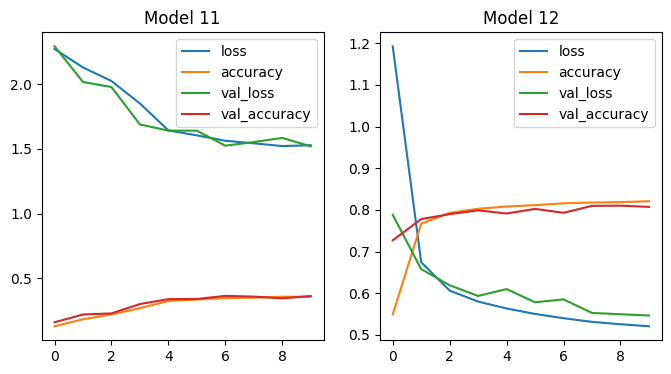

In [60]:
import pandas as pd
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(8)
fig.set_figheight(4)
# Plot non-normalised data loss curves
pd.DataFrame(model_11_his.history).plot(ax=axes[0], title="Model 11")
# Plot normalised data loss curves
pd.DataFrame(model_12_his.history).plot(ax=axes[1], title="Model 12")

## Finding the ideal learning rate

In [61]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-3 * 10 ** (epoch/20))

# Fit the model
model_13_his = model_13.fit(
    train_data_norm, 
    train_labels, 
    epochs=50, 
    verbose=0,
    validation_data=(test_data_norm, test_labels),
    callbacks=[lr_scheduler]
)


Text(0.5, 1.0, 'Finding the ideal learning rate')

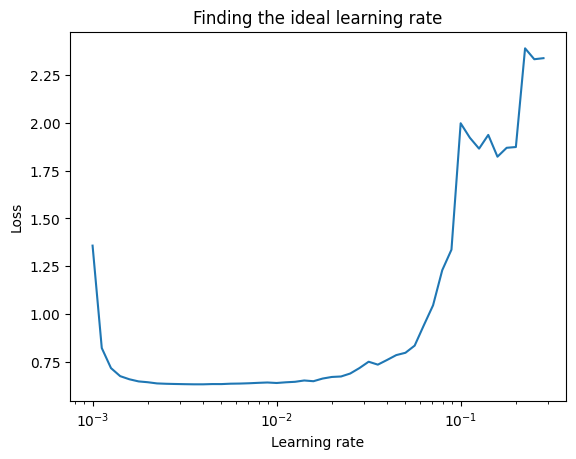

In [62]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10 ** (tf.range(50)/20))
plt.semilogx(lrs, model_13_his.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [63]:
# Ideal learning rate
10**-3

0.001

In [64]:
# Let's refit a model with the ideal learning rate

# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=10**-3),
                 metrics=["accuracy"])

# Fit the model
model_14_his = model_14.fit(
    train_data_norm, 
    train_labels, 
    epochs=20, 
    verbose=0,
    validation_data=(test_data_norm, test_labels)
)
model_14.evaluate(test_data_norm, test_labels)


313/313 [==============================] - 0s 767us/step - loss: 0.5627 - accuracy: 0.8038


[0.5627197027206421, 0.8037999868392944]

## Evaluating our multi-class classification model

To evaluate our multi-class classification model we couldd:
* Evaluate its performance using other classification metrics (such as confusion matrix)
* Assess some of its predictions (through visualizations)
* Improve its results (by training it for longer or changing the architecture)
* Save and export it for use in an application

Let's go through the top 2...

In [65]:
# Create a confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

figsize = (10,10)

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):
    # Crate the confusion matrix
    cm = confusion_matrix(y_true, tf.round(y_pred))
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    n_classes = cm.shape[0]
    
    # Let's prettify it
    fig, ax = plt.subplots(figsize=figsize)
    # Create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)
    
    if classes:
        labels =classes
    else:
        labels = np.arange(cm.shape[0])
    
    # Label the axes
    ax.set(title="Confusion Matrix",
           xlabel="Predicted Label",
           ylabel="True Label",
           xticks=np.arange(n_classes),
           yticks=np.arange(n_classes),
           xticklabels=labels,
           yticklabels=labels)
    
    # Set x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()
    
    # Adjust label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)
    
    # Set treshold for different colors
    threshold = (cm.max() + cm.min()) / 2.
    
    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black",
                 size=text_size)

In [66]:
# Make some predictions w our model
y_prods = model_14.predict(test_data_norm)

# View the first 5 predictions
y_prods[:5]

313/313 [==============================] - 0s 579us/step


array([[7.42730917e-03, 1.78757182e-06, 3.37770616e-05, 7.46775093e-03,
        3.17396334e-05, 1.15660973e-01, 2.44351337e-03, 6.67571872e-02,
        1.06781065e-01, 6.93394959e-01],
       [3.83591861e-04, 1.64201343e-11, 9.54753757e-01, 1.20155039e-06,
        4.09270404e-03, 1.66828393e-16, 4.07599583e-02, 6.57486454e-34,
        8.75250589e-06, 5.60816916e-24],
       [5.17964236e-06, 9.88408029e-01, 2.82944912e-09, 1.14075774e-02,
        1.68452592e-04, 9.68008819e-15, 1.07859787e-05, 4.07693906e-10,
        7.34576219e-11, 1.76411208e-12],
       [7.29422993e-08, 9.97156858e-01, 3.13517333e-13, 2.84199137e-03,
        1.04218964e-06, 6.38100566e-18, 4.36751328e-08, 3.39568418e-09,
        2.68581628e-14, 9.84316253e-13],
       [1.31908670e-01, 5.07233972e-06, 1.20900132e-01, 2.15997994e-02,
        4.18141596e-02, 1.86891683e-11, 6.82588935e-01, 1.33268955e-19,
        1.18319027e-03, 1.84517291e-13]], dtype=float32)

In [67]:
y_prods[0], tf.argmax(y_prods[0]), class_names[tf.argmax(y_prods[0])]

(array([7.42730917e-03, 1.78757182e-06, 3.37770616e-05, 7.46775093e-03,
        3.17396334e-05, 1.15660973e-01, 2.44351337e-03, 6.67571872e-02,
        1.06781065e-01, 6.93394959e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [68]:
# Convert all of the predictions into integers
y_preds = y_prods.argmax(axis=1)
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

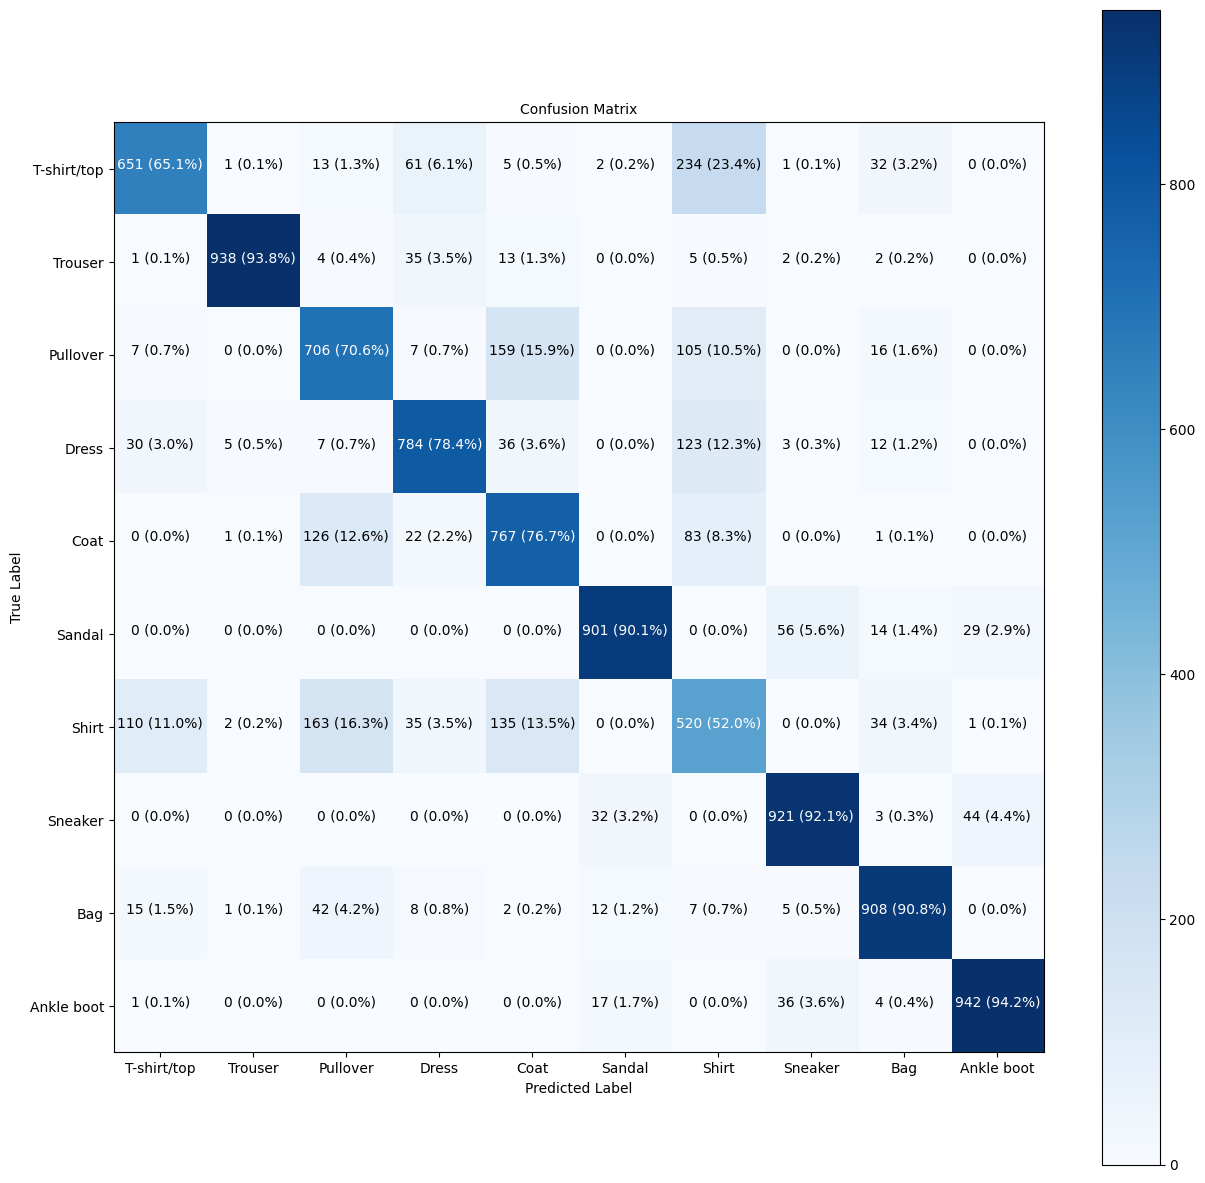

In [69]:
# Make prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15,15),
                      text_size=10)

How about we crate a fun little function for:
* Plot random image
* Make a prediction on said image
* Label the plot with truth label and the prediccted label

In [70]:
import random

def plot_random_image(model, images, true_labels, classes):
    #Set up random integer
    i = random.randint(0, len(images))

    # Create predictions and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    # Plot the image
    plt.imshow(target_image, cmap=plt.cm.binary)

    # Change the color of the titles depending on if the prediction is right or wrong
    if pred_label == true_label:
        color = "blue"
    else:
        color = "red"

    # Add xlabel information (prediction/true label
    plt.xlabel(
        "Pred: {} {:2.0f}% (True: {})".format(
            pred_label,
            100 * tf.reduce_max(pred_probs),
            true_label
        ), 
        color=color
    )

1/1 [==============================] - 0s 23ms/step


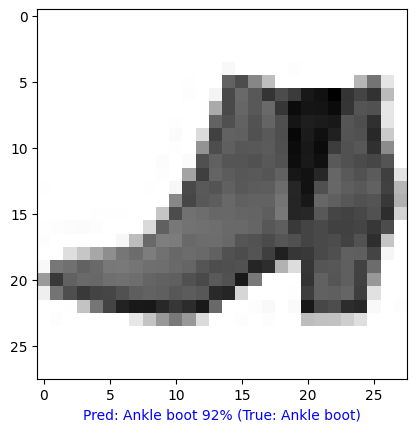

In [71]:
# Check out a random image as well as its prediction
plot_random_image(
    model=model_14,
    images=test_data_norm,
    true_labels=test_labels,
    classes=class_names
)

## What patterns is our model learning?

In [72]:
# Find the layers of our most recent model
model_14.layers

In [73]:
# Extrat a particular layer
model_14.layers[1]

In [74]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 0.6039267 ,  0.29104504,  0.5376495 , -0.98668766],
        [ 1.1911317 ,  0.69654936,  0.08260816, -0.06123373],
        [ 1.2718807 , -0.07506953,  0.8160546 , -0.4820011 ],
        ...,
        [ 0.14973281, -1.133     ,  0.10942789, -0.23203844],
        [ 0.44190872, -0.50597304,  0.71761763, -0.76185924],
        [ 0.08105674, -0.44402212, -0.22536619,  0.41856968]],
       dtype=float32),
 (784, 4))

In [75]:
# Let's check out the bias
biases, biases.shape

(array([0.45725778, 1.5574007 , 0.55781424, 0.21354076], dtype=float32), (4,))

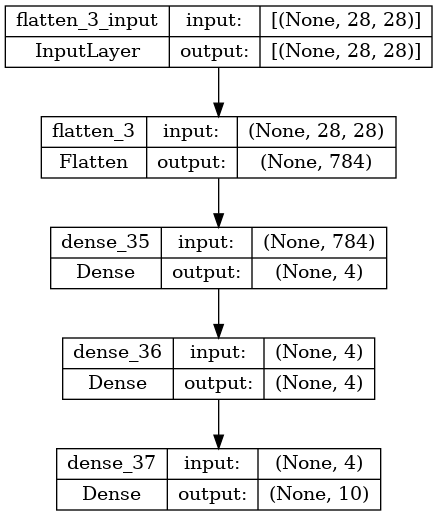

In [76]:
from tensorflow.keras.utils import plot_model

plot_model(model_14, show_shapes=True)

In [1]:
!rm -rf model.png